In [1]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [2]:
companies_dict = {
    'Bradesco':'BBDC3.SA',
    'Magalu':'MGLU3.SA',
    'OI':'OIBR3.SA',
    'Itausa':'ITSA4.SA',
    'Klabin':'KLBN3.SA',
    'Tecnisa':'TCSA3.SA',
    'BSeguridade':'BBSE3.SA',
    'Petrobras':'PETR4.SA'
    }

print(companies_dict.values())

dict_values(['BBDC3.SA', 'MGLU3.SA', 'OIBR3.SA', 'ITSA4.SA', 'KLBN3.SA', 'TCSA3.SA', 'BBSE3.SA', 'PETR4.SA'])


In [3]:
data_source = 'yahoo' # Source of data is yahoo finance.
start_date = '01-01-2015'
end_date = '31-12-2017'
df = data.DataReader(list(companies_dict.values()),
 data_source,start_date,end_date)

In [ ]:
retorno = 0

for com in list(companies_dict.values()):
    retDiario = df['Close'][com].pct_change()
    retDiario = (retDiario + 1).cumprod()-1
    print(com)
    print(retDiario[len(retDiario)-1])


In [41]:
for com in list(companies_dict.values()):
    ret = np.log(df['Adj Close'][com] / df['Adj Close'][com].shift(1))
    desv = ret.std() * 250 ** 0.5
    print(com)
    print(desv)

BBDC3.SA
0.31323855167395537
MGLU3.SA
0.7348098859034237
OIBR3.SA
0.8296946257541898
ITSA4.SA
0.2948074031367954
KLBN3.SA
0.7184611868539426
TCSA3.SA
0.4119828784507138
BBSE3.SA
0.3471522457786328
PETR4.SA
0.5396444409550589


In [87]:
inicial = len(df.columns) / 6

df = df.dropna(how='all', axis=1)

final = len(df.columns) / 6

stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

movements = stock_close - stock_open

#‘sum_of_movement’ of a company is defined as sum of differences of closing and opening prices of all days.
sum_of_movement = np.sum(movements,1)


print(len(df.columns))
print(len(companies_dict))
print('----')
print(inicial)
print(final)


48
8
----
8.0
8.0


In [88]:
#The company and its ‘sum_of_movement’ is printed.
#Have positive ‘sum_of_movement’. Hence it is advisable to go long(buy) on these stocks.
#Have negative ‘sum_of_movement’. Hence it is advisable to short(sell) the stocks.
for i in range(len(companies_dict)-1):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:BBDC3.SA, Change:5.334010124206543
company:MGLU3.SA, Change:0.6078610233962536
company:OIBR3.SA, Change:-14.321333646774292
company:ITSA4.SA, Change:-1.6065406799316406
company:KLBN3.SA, Change:-4.240002155303955
company:TCSA3.SA, Change:-37.4835147857666
company:BBSE3.SA, Change:0.5200271606445312


In [98]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 4,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

In [119]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.values())}).sort_values(by=['labels'],axis = 0)

print(labels)
print(labels[2])
print(df1['labels'][2])

for i in range(len(df1.index)):
    print(df1['labels'][i])
    txt = df1['companies'][i].replace('.SA', '')
    print(txt)

[1 2 3 1 0 1 1 1]
3
3
1
BBDC3
2
MGLU3
3
OIBR3
1
ITSA4
0
KLBN3
1
TCSA3
1
BBSE3
1
PETR4


In [94]:
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 4,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
labels = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)
print(df2)

   labels    companies
1       0       Magalu
4       0       Klabin
0       1     Bradesco
3       1       Itausa
6       1  BSeguridade
7       1    Petrobras
2       2           OI
5       3      Tecnisa


<Figure size 432x288 with 0 Axes>

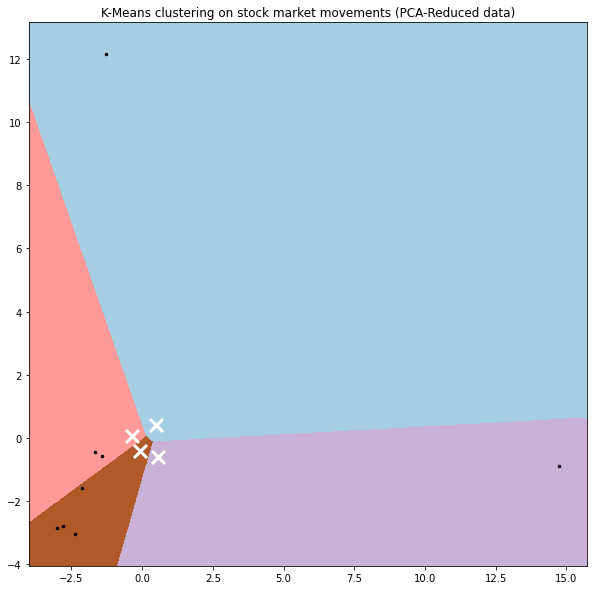

In [35]:
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()